*Source of the case study:* https://8weeksqlchallenge.com/case-study-3/

---

## Case Study #3 - Foodie-Fi

**Introduction**
<br>Subscription based businesses are super popular and Danny realised that there was a large gap in the market - he wanted to create a new streaming service that only had food related content - something like Netflix but with only cooking shows!

Danny finds a few smart friends to launch his new startup Foodie-Fi in 2020 and started selling monthly and annual subscriptions, giving their customers unlimited on-demand access to exclusive food videos from around the world!

Danny created Foodie-Fi with a data driven mindset and wanted to ensure all future investment decisions and new features were decided using data. This case study focuses on using subscription style digital data to answer important business questions.

**Available Data**
<br>Danny has shared the data design for Foodie-Fi and also short descriptions on each of the database tables - our case study focuses on only 2 tables but there will be a challenge to create a new table for the Foodie-Fi team.

**Entity Relationship Diagram**
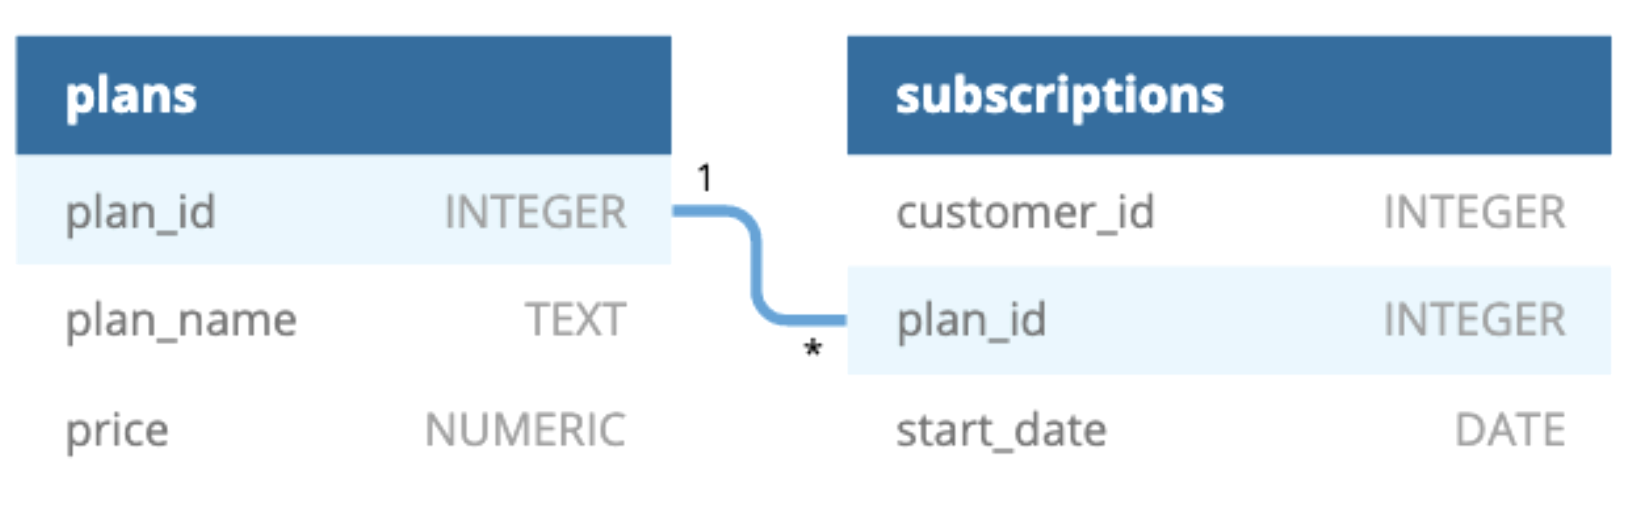

**Table 1: plans**
<BR>Customers can choose which plans to join Foodie-Fi when they first sign up.

**Basic plan** customers have limited access and can only stream their videos and is only available monthly at \\$9.90

**Pro plan** customers have no watch time limits and are able to download videos for offline viewing. Pro plans start at \\$19.90 a month or \\$199 for an annual subscription.

Customers can sign up to an initial 7 day **free trial** will automatically continue with the pro monthly subscription plan unless they cancel, downgrade to basic or upgrade to an annual pro plan at any point during the trial.

When customers cancel their Foodie-Fi service - they will have a **`churn` plan** record with a `null` price but their plan will continue until the end of the billing period.

**Table 2: subscriptions**
<BR>Customer subscriptions show the exact date where their specific `plan_id` starts.

If customers downgrade from a pro plan or cancel their subscription - the higher plan will remain in place until the period is over - the `start_date` in the `subscriptions` table will reflect the date that the actual plan changes.

When customers upgrade their account from a basic plan to a pro or annual pro plan - the higher plan will take effect straightaway.

When customers churn - they will keep their access until the end of their current billing period but the `start_date` will be technically the day they decided to cancel their service.

All datasets exist within the `foodie_fi` database schema,that you can find in an additional file [here](https://github.com/etsar/SQL-practice/blob/main/SQL_case_study_3%20-%20Foodie_Fi/SQL_case_study_3_DBschema.ipynb).

**Case Study Questions**

This case study is split into an initial data understanding question before diving straight into data analysis questions before finishing with 1 single extension challenge.

- **A. Customer Journey**

    Based off the 8 sample customers provided in the sample from the `subscriptions` table, write a brief description about each customer’s onboarding journey.
    <BR>Try to keep it as short as possible - you may also want to run some sort of join to make your explanations a bit easier!

- **B. Data Analysis Questions**
    1. How many customers has Foodie-Fi ever had?
    2. What is the monthly distribution of `trial` plan `start_date` values for our dataset - use the start of the month as the group by value
    3. What plan `start_date` values occur after the year 2020 for our dataset? Show the breakdown by count of events for each `plan_name`
    4. What is the customer count and percentage of customers who have churned rounded to 1 decimal place?
    5. How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?
    6. What is the number and percentage of customer plans after their initial free trial?
    7. What is the customer count and percentage breakdown of all 5 `plan_name` values at `2020-12-31`?
    8. How many customers have upgraded to an annual plan in 2020?
    9. How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?
    10. Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)
    11. How many customers downgraded from a pro monthly to a basic monthly plan in 2020?

- **C. Challenge Payment Question**
<BR>The Foodie-Fi team wants you to create a new payments table for the year 2020 that includes amounts paid by each customer in the subscriptions table with the following requirements:
    - monthly payments always occur on the same day of month as the original start_date of any monthly paid plan
    - upgrades from basic to monthly or pro plans are reduced by the current paid amount in that month and start immediately
    - upgrades from pro monthly to pro annual are paid at the end of the current billing period and also starts at the end of the month period
    - once a customer churns they will no longer make payments

**A. Customer Journey**

<a id='queryA'></a>
**Based off the 8 sample customers provided in the sample from the `subscriptions` table, write a brief description about each customer’s onboarding journey.**

**Query #1**

    SELECT s.*, 
    	   p.plan_name, 
           p.price
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE s.customer_id IN (1, 2, 11, 13, 15, 16, 18, 19)
    ORDER BY s.customer_id, start_date;

| customer_id | plan_id | start_date               | plan_name     | price  |
| ----------- | ------- | ------------------------ | ------------- | ------ |
| 1           | 0       | 2020-08-01T00:00:00.000Z | trial         | 0.00   |
| 1           | 1       | 2020-08-08T00:00:00.000Z | basic monthly | 9.90   |
| 2           | 0       | 2020-09-20T00:00:00.000Z | trial         | 0.00   |
| 2           | 3       | 2020-09-27T00:00:00.000Z | pro annual    | 199.00 |
| 11          | 0       | 2020-11-19T00:00:00.000Z | trial         | 0.00   |
| 11          | 4       | 2020-11-26T00:00:00.000Z | churn         |        |
| 13          | 0       | 2020-12-15T00:00:00.000Z | trial         | 0.00   |
| 13          | 1       | 2020-12-22T00:00:00.000Z | basic monthly | 9.90   |
| 13          | 2       | 2021-03-29T00:00:00.000Z | pro monthly   | 19.90  |
| 15          | 0       | 2020-03-17T00:00:00.000Z | trial         | 0.00   |
| 15          | 2       | 2020-03-24T00:00:00.000Z | pro monthly   | 19.90  |
| 15          | 4       | 2020-04-29T00:00:00.000Z | churn         |        |
| 16          | 0       | 2020-05-31T00:00:00.000Z | trial         | 0.00   |
| 16          | 1       | 2020-06-07T00:00:00.000Z | basic monthly | 9.90   |
| 16          | 3       | 2020-10-21T00:00:00.000Z | pro annual    | 199.00 |
| 18          | 0       | 2020-07-06T00:00:00.000Z | trial         | 0.00   |
| 18          | 2       | 2020-07-13T00:00:00.000Z | pro monthly   | 19.90  |
| 19          | 0       | 2020-06-22T00:00:00.000Z | trial         | 0.00   |
| 19          | 2       | 2020-06-29T00:00:00.000Z | pro monthly   | 19.90  |
| 19          | 3       | 2020-08-29T00:00:00.000Z | pro annual    | 199.00 |

**Customer_id = 1** signed up to an initial 7 day free **trial** on 2020-08-01, and after its expiration on 2020-08-08 the customer continued with the **basic monthly plan**.

**Customer_id = 2** signed up to an initial 7 day free **trial** on 2020-09-20, and after its expiration on 2020-09-27 the customer continued with the **pro annual plan**.

**Customer_id = 11** signed up to an initial 7 day free **trial** on 2020-11-19, and after its expiration on 2020-11-26 the customer decided to cancel the service.

**Customer_id = 13** signed up to an initial 7 day free **trial** on 2020-12-15, and after its expiration on 2020-12-22 the customer continued with the **basic monthly plan**. Then on 2021-03-29, the customer decided to upgrade their account to the **pro monthly plan**.

**Customer_id = 15** signed up to an initial 7 day free **trial** on 2020-03-17, and after its expiration on 2020-03-24 the customer automatically continued with the **pro monthly plan**. But a month later, on 2020-04-29, the customer decided to cancel the service.

**Customer_id = 16** signed up to an initial 7 day free **trial** on 2020-05-31, and after its expiration on 2020-06-07 the customer continued with the **basic monthly plan**. Then on 2020-10-21, the customer decided to upgrade the account to the **pro annual plan**.

**Customer_id = 18** signed up to an initial 7 day free **trial** on 2020-07-06, and after its expiration on 2020-07-13 the customer automatically continued with the **pro monthly plan**.

**Customer_id = 19** signed up to an initial 7 day free **trial** on 2020-06-22, and after its expiration on 2020-06-29 the customer automatically continued with the **pro monthly plan**. Then in two months, on 2020-08-29, the customer decided to upgrade the account to the **pro annual plan**.

---

**B. Data Analysis Questions**

**B1.How many customers has Foodie-Fi ever had?**

**Query #2**

    SELECT COUNT(DISTINCT customer_id) AS customer_cnt
    FROM foodie_fi.subscriptions;

| customer_cnt |
| ------------ |
| 1000         |

Therefore, Foodie-Fi have had 1000 customers for the entire period.

---

**B2.What is the monthly distribution of trial plan `start_date` values for our dataset?**

**Query #3**

    SELECT EXTRACT(MONTH FROM s.start_date) AS trial_month,
    	   COUNT(s.customer_id) AS customer_cnt
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name ILIKE 'trial'
    GROUP BY 1;

| trial_month | customer_cnt |
| ----------- | ------------ |
| 1           | 88           |
| 2           | 68           |
| 3           | 94           |
| 4           | 81           |
| 5           | 88           |
| 6           | 79           |
| 7           | 89           |
| 8           | 88           |
| 9           | 87           |
| 10          | 79           |
| 11          | 75           |
| 12          | 84           |

The maximum number of trials was in March. The minimum number of trials - in February.

---

**B3.What plan `start_date` values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name**

**Query #4**

    SELECT p.plan_name,
    	   COUNT(s.customer_id) AS events_after_2020
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE EXTRACT(YEAR FROM s.start_date) > 2020
    GROUP BY 1;

| plan_name     | events_after_2020 |
| ------------- | ----------------- |
| pro annual    | 63                |
| churn         | 71                |
| pro monthly   | 60                |
| basic monthly | 8                 |

After 2020 there were no trial plans. Most of the customers decided to cancel the service after 2020. 
<br>Least of the customers chose basic monthly plan after 2020.

---

**B4.What is the customer count and percentage of customers who have churned rounded to 1 decimal place?**

**Query #5**

    SELECT COUNT(s.customer_id) AS churn_clients_cnt,
    	   ROUND(COUNT(s.customer_id)::numeric/(SELECT COUNT(DISTINCT customer_id) FROM foodie_fi.subscriptions) *100, 1) AS churn_clients_percentage
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name ILIKE 'churn';

| churn_clients_cnt | churn_clients_percentage |
| ----------------- | ------------------------ |
| 307               | 30.7                     |

Therefore, 307 Foodie-Fi customers churned, which is 30.7% of all Foodie-Fi customers.

---

**B5.How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?**

**Query #6**

    WITH t AS
    (SELECT s.*,
    	    p.plan_name,
            COUNT(*) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) AS event_rank
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id)
    
    SELECT COUNT(customer_id) AS churn_after_trial_cnt,
    	   ROUND(COUNT(customer_id)::numeric/(SELECT COUNT(DISTINCT customer_id) FROM t) *100, 0) AS churn_after_trial_percentage
    FROM t
    WHERE customer_id IN (SELECT customer_id FROM t WHERE event_rank=1 AND plan_name ILIKE 'trial')
    AND (event_rank=2 AND plan_name ILIKE 'churn');

| churn_after_trial_cnt | churn_after_trial_percentage |
| --------------------- | ---------------------------- |
| 92                    | 9                            |

---

So, 92 Foodie-Fi customers have churned right after their initial free trial, which is around 9%.

---

**B6.What is the number and percentage of customer plans after their initial free trial?**

**Query #7**

    WITH t AS
    (SELECT s.*,
    	    p.plan_name,
            COUNT(*) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) AS event_rank
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id)
    SELECT plan_name,
    	   COUNT(customer_id) AS plans_after_trial_cnt,
    	   ROUND(COUNT(customer_id)::numeric/(SELECT COUNT(DISTINCT customer_id) FROM t) *100, 0) AS plans_after_trial_percentage
    FROM t
    WHERE event_rank = 2
    GROUP BY 1
    ORDER BY 2 DESC;

| plan_name     | plans_after_trial_cnt | plans_after_trial_percentage |
| ------------- | --------------------- | ---------------------------- |
| basic monthly | 546                   | 55                           |
| pro monthly   | 325                   | 33                           |
| churn         | 92                    | 9                            |
| pro annual    | 37                    | 4                            |

The majority of Foodie-Fi customers (546 or 55%) have used the basic monthly plan after their initial free trial.
<br>One third of Foodie-Fi customers (325 or 33%) have used the pro monthly plan.
<br>Only 4% (or 37) Foodie-Fi customers have used the pro annual plan.
<br>And the last part of Foodie-Fi customers (92 or 9%) have churned after their initial free trial, which is in line with the previous finding.

---

**B7.What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?**

**Query #8**

    WITH t AS
    (SELECT s.*,
    	    p.plan_name,
            CASE WHEN LEAD(s.start_date) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) <= '2020-12-31' THEN 'not active'
            ELSE 'active' 
            END AS plan_status_at_20201231
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE s.start_date <= '2020-12-31')
    SELECT plan_name,
    	   COUNT(customer_id) AS active_plans_at_20201231_cnt,
    	   ROUND(COUNT(customer_id)::numeric/(SELECT COUNT(DISTINCT customer_id) FROM t) *100, 1) AS active_plans_at_20201231_percentage
    FROM t
    WHERE plan_status_at_20201231 LIKE 'active'
    GROUP BY 1
    ORDER BY 2 DESC;

| plan_name     | active_plans_at_20201231_cnt | active_plans_at_20201231_percentage |
| ------------- | ---------------------------- | ----------------------------------- |
| pro monthly   | 326                          | 32.6                                |
| churn         | 236                          | 23.6                                |
| basic monthly | 224                          | 22.4                                |
| pro annual    | 195                          | 19.5                                |
| trial         | 19                           | 1.9                                 |

Therefore, as at 12-31-2020 most Foodie-Fi customers (326 or 32.6%) have had the pro monthly plan activated.
<br>Another 236 (or 23.6%) Foodie-Fi customers have actively used the basic monthly plan at 12-31-2020.
<br>Around 19.5% (or 195) Foodie-Fi customers have had the pro annual plan activated as at 12-31-2020.
<br>Only 1.9% (or 19) Foodie-Fi customers have used the free trial as at 12-31-2020.
<br>There are 1000 customers in total, which is in line with the fact that Foodie-Fi have had 1000 customers.

---

**B8.How many customers have upgraded to an annual plan in 2020?**

**Query #9**

    SELECT COUNT(s.customer_id) AS upgrades_annual_cnt,
    	   ROUND(COUNT(s.customer_id)::numeric/(SELECT COUNT(DISTINCT customer_id) FROM foodie_fi.subscriptions) *100) AS upgrades_annual_percentage
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE EXTRACT(YEAR FROM start_date) = 2020
    AND plan_name ILIKE 'pro annual';

| upgrades_annual_cnt | upgrades_annual_percentage |
| ------------------- | -------------------------- |
| 195                 | 20                         |

Only 20% of Foodie-Fi customers have upgraded to an annual plan in 2020.

---

**B9.How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?**

**Query #10**

    WITH t AS
    (SELECT s.customer_id,
    	    p.plan_name,
            s.start_date,
    	    LEAD(s.start_date) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) - s.start_date AS switch_to_annual_plan_days
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name IN ('trial', 'pro annual'))
    SELECT ROUND(AVG(switch_to_annual_plan_days)) AS avg_switch_to_annual_plan_days
    FROM t;

| avg_switch_to_annual_plan_days |
| ------------------------------ |
| 105                            |

Therefore, on average it takes 105 days for Foodie-Fi customers to switch to the pro annual plan from the day they joined Foodie-Fi.

---

**B10.Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)**

**Query #11**

    WITH t AS
    (SELECT s.customer_id,
    	    p.plan_name,
            s.start_date,
    	    LEAD(s.start_date) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) - s.start_date AS switch_to_annual_plan_days 
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name IN ('trial', 'pro annual'))
    SELECT CASE WHEN switch_to_annual_plan_days <= 30 THEN '0-30 days'
    			WHEN switch_to_annual_plan_days <= 60 THEN '31-60 days'
                WHEN switch_to_annual_plan_days <= 90 THEN '61-90 days'
                WHEN switch_to_annual_plan_days <= 120 THEN '91-120 days'
                WHEN switch_to_annual_plan_days <= 150 THEN '121-150 days'
                WHEN switch_to_annual_plan_days <= 180 THEN '151-180 days'
                WHEN switch_to_annual_plan_days <= 210 THEN '181-210 days'
                WHEN switch_to_annual_plan_days <= 240 THEN '211-240 days'
                WHEN switch_to_annual_plan_days <= 270 THEN '241-270 days'
                WHEN switch_to_annual_plan_days <= 300 THEN '271-300 days'
                WHEN switch_to_annual_plan_days <= 330 THEN '301-330 days'
                WHEN switch_to_annual_plan_days <= 366 THEN '331-366 days'
           END AS switch_to_annual_plan_period,
           COUNT(customer_id) AS customers_cnt
    FROM t
    WHERE switch_to_annual_plan_days IS NOT NULL
    GROUP BY 1
    ORDER BY 2 DESC;

| switch_to_annual_plan_period | customers_cnt |
| ---------------------------- | ------------- |
| 0-30 days                    | 49            |
| 121-150 days                 | 42            |
| 151-180 days                 | 36            |
| 91-120 days                  | 35            |
| 61-90 days                   | 34            |
| 181-210 days                 | 26            |
| 31-60 days                   | 24            |
| 241-270 days                 | 5             |
| 211-240 days                 | 4             |
| 331-366 days                 | 1             |
| 301-330 days                 | 1             |
| 271-300 days                 | 1             |

The majority of Foodie-Fi customers that switched to the pro annual plan did it during the first month from the day they joined Foodie-Fi. 
<br>Almost every customer who switched to the pro annual plan did it during half a year from the day they joined Foodie-Fi.

---

**B11.How many customers downgraded from a pro monthly to a basic monthly plan in 2020?**

**Query #12**

    WITH t AS
    (SELECT s.customer_id,
    	    p.plan_name,
            s.start_date,
            CASE WHEN p.plan_name ILIKE 'pro monthly' AND s.start_date < LEAD(s.start_date) OVER(PARTITION BY customer_id ORDER BY start_date) THEN 'downgraded'
            	 ELSE NULL
            END AS downgrade_pro_basic
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE p.plan_name IN ('pro monthly', 'basic monthly')
    AND EXTRACT(YEAR FROM start_date) = 2020)
    SELECT COUNT(customer_id) AS downgrade_pro_basic_cnt
    FROM t
    WHERE downgrade_pro_basic ILIKE 'downgraded';

| downgrade_pro_basic_cnt |
| ----------------------- |
| 0                       |

Nobody downgraded form a pro monthly to a basic monthly plan in 2020.

---

**C. Challenge Payment Question**

Create a new payments table for the year 2020 that includes amounts paid by each customer in the subscriptions table with the following requirements:
- monthly payments always occur on the same day of month as the original start_date of any monthly paid plan
- upgrades from basic to monthly or pro plans are reduced by the current paid amount in that month and start immediately
- upgrades from pro monthly to pro annual are paid at the end of the current billing period and also starts at the end of the month period
- once a customer churns they will no longer make payments.

Let's create a temporary table with additional columns with the following plan name and its start date:

**Query #13**

    CREATE TEMP TABLE lead_table AS
    (SELECT s.customer_id,
    		s.plan_id,
    	    p.plan_name,
            s.start_date,
            LEAD(s.start_date) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) AS lead_start_date,
            LEAD(p.plan_name) OVER(PARTITION BY s.customer_id ORDER BY s.start_date) AS lead_plan_name,
            p.price
    FROM foodie_fi.subscriptions s
    LEFT JOIN foodie_fi.plans p ON s.plan_id = p.plan_id
    WHERE plan_name NOT LIKE 'trial'
    AND EXTRACT(YEAR FROM s.start_date) = 2020);

There are no results to be displayed.

Since the table is too long, there are just several rows of this table:

**Query #14**

    SELECT *
    FROM lead_table;

| customer_id | plan_id | plan_name     | start_date               | lead_start_date          | lead_plan_name | price  |
| ----------- | ------- | ------------- | ------------------------ | ------------------------ | -------------- | ------ |
| 1           | 1       | basic monthly | 2020-08-08T00:00:00.000Z |                          |                | 9.90   |
| 2           | 3       | pro annual    | 2020-09-27T00:00:00.000Z |                          |                | 199.00 |
| 3           | 1       | basic monthly | 2020-01-20T00:00:00.000Z |                          |                | 9.90   |
| 4           | 1       | basic monthly | 2020-01-24T00:00:00.000Z | 2020-04-21T00:00:00.000Z | churn          | 9.90   |
| 4           | 4       | churn         | 2020-04-21T00:00:00.000Z |                          |                |        |
| 5           | 1       | basic monthly | 2020-08-10T00:00:00.000Z |                          |                | 9.90   |
| 6           | 1       | basic monthly | 2020-12-30T00:00:00.000Z |                          |                | 9.90   |
| 7           | 1       | basic monthly | 2020-02-12T00:00:00.000Z | 2020-05-22T00:00:00.000Z | pro monthly    | 9.90   |
| 7           | 2       | pro monthly   | 2020-05-22T00:00:00.000Z |                          |                | 19.90  |
| 8           | 1       | basic monthly | 2020-06-18T00:00:00.000Z | 2020-08-03T00:00:00.000Z | pro monthly    | 9.90   |
| 8           | 2       | pro monthly   | 2020-08-03T00:00:00.000Z |                          |                | 19.90  |
| 9           | 3       | pro annual    | 2020-12-14T00:00:00.000Z |                          |                | 199.00 |
| 10          | 2       | pro monthly   | 2020-09-26T00:00:00.000Z |                          |                | 19.90  |
| 11          | 4       | churn         | 2020-11-26T00:00:00.000Z |                          |                |        |
| 12          | 1       | basic monthly | 2020-09-29T00:00:00.000Z |                          |                | 9.90   |
| 13          | 1       | basic monthly | 2020-12-22T00:00:00.000Z |                          |                | 9.90   |
| 14          | 1       | basic monthly | 2020-09-29T00:00:00.000Z |                          |                | 9.90   |
| 15          | 2       | pro monthly   | 2020-03-24T00:00:00.000Z | 2020-04-29T00:00:00.000Z | churn          | 19.90  |
| 15          | 4       | churn         | 2020-04-29T00:00:00.000Z |                          |                |        |
| 16          | 1       | basic monthly | 2020-06-07T00:00:00.000Z | 2020-10-21T00:00:00.000Z | pro annual     | 9.90   |
| 16          | 3       | pro annual    | 2020-10-21T00:00:00.000Z |                          |                | 199.00 |
| 17          | 1       | basic monthly | 2020-08-03T00:00:00.000Z | 2020-12-11T00:00:00.000Z | pro annual     | 9.90   |
| 17          | 3       | pro annual    | 2020-12-11T00:00:00.000Z |                          |                | 199.00 |
| 18          | 2       | pro monthly   | 2020-07-13T00:00:00.000Z |                          |                | 19.90  |
| 19          | 2       | pro monthly   | 2020-06-29T00:00:00.000Z | 2020-08-29T00:00:00.000Z | pro annual     | 19.90  |
| 19          | 3       | pro annual    | 2020-08-29T00:00:00.000Z |                          |                | 199.00 |
| 20          | 1       | basic monthly | 2020-04-15T00:00:00.000Z | 2020-06-05T00:00:00.000Z | pro annual     | 9.90   |
| 20          | 3       | pro annual    | 2020-06-05T00:00:00.000Z |                          |                | 199.00 |
| 21          | 1       | basic monthly | 2020-02-11T00:00:00.000Z | 2020-06-03T00:00:00.000Z | pro monthly    | 9.90   |
| 21          | 2       | pro monthly   | 2020-06-03T00:00:00.000Z | 2020-09-27T00:00:00.000Z | churn          | 19.90  |
| 21          | 4       | churn         | 2020-09-27T00:00:00.000Z |                          |                |        |
| 22          | 2       | pro monthly   | 2020-01-17T00:00:00.000Z |                          |                | 19.90  |
| 23          | 3       | pro annual    | 2020-05-20T00:00:00.000Z |                          |                | 199.00 |
| 24          | 2       | pro monthly   | 2020-11-17T00:00:00.000Z |                          |                | 19.90  |
| 25          | 1       | basic monthly | 2020-05-17T00:00:00.000Z | 2020-06-16T00:00:00.000Z | pro monthly    | 9.90   |
| 25          | 2       | pro monthly   | 2020-06-16T00:00:00.000Z |                          |                | 19.90  |
| 26          | 2       | pro monthly   | 2020-12-15T00:00:00.000Z |                          |                | 19.90  |
| 27          | 2       | pro monthly   | 2020-08-31T00:00:00.000Z |                          |                | 19.90  |
| 28          | 3       | pro annual    | 2020-07-07T00:00:00.000Z |                          |                | 199.00 |
| 29          | 2       | pro monthly   | 2020-01-30T00:00:00.000Z |                          |                | 19.90  |
| 30          | 1       | basic monthly | 2020-05-06T00:00:00.000Z |                          |                | 9.90   |
...
| 998         | 2       | pro monthly   | 2020-10-19T00:00:00.000Z |                          |                | 19.90  |
| 999         | 2       | pro monthly   | 2020-10-30T00:00:00.000Z | 2020-12-01T00:00:00.000Z | churn          | 19.90  |
| 999         | 4       | churn         | 2020-12-01T00:00:00.000Z |                          |                |        |
| 1000        | 2       | pro monthly   | 2020-03-26T00:00:00.000Z | 2020-06-04T00:00:00.000Z | churn          | 19.90  |
| 1000        | 4       | churn         | 2020-06-04T00:00:00.000Z |                          |                |        |

---

Let's create breakdowns of different situations with plans, adding the payment dates according to the description of the question:

- let's select only active users, which have been using monthly plans - basic monthly and pro monthly:

**Query #15**

    WITH t1 AS
    (SELECT *,
    	    generate_series(start_date, timestamp '2020-12-31', '1 month')::date AS payment_date
    FROM lead_table
    WHERE plan_name IN ('basic monthly', 'pro monthly') 
    	  AND lead_plan_name IS NULL),

- let's select only non-active users - churned:

    t2 AS
    (SELECT *,
    	    generate_series(start_date, lead_start_date-1, '1 month')::date AS payment_date
    FROM lead_table
    WHERE lead_plan_name ILIKE 'churn'),

- let's select only users, who switched from basic monthly plan to any of pro plans - pro monthly or pro annual:

    t3 AS
    (SELECT *,
    	    generate_series(start_date, lead_start_date-1, '1 month')::date AS payment_date
    FROM lead_table
    WHERE plan_name ILIKE 'basic monthly'
    	  AND lead_plan_name IN ('pro monthly', 'pro annual')),

- let's select only users, who switched from pro monthly plan to pro annual:

    t4 AS      
    (SELECT *,
    	    generate_series(start_date, lead_start_date-1, '1 month')::date AS payment_date
    FROM lead_table
    WHERE plan_name ILIKE 'pro monthly'
    	  AND lead_plan_name ILIKE 'pro annual'),

- let's select the last group of users, that we haven't covered yet, - pro annual users:

    t5 AS  
    (SELECT *,
    	    start_date AS payment_date
    FROM lead_table
    WHERE plan_name ILIKE 'pro annual'),

- let's union all the temp tables t1-t5:

    union_table AS
    (SELECT *
    FROM t1
    UNION ALL 
    SELECT *
    FROM t2
    UNION ALL 
    SELECT *
    FROM t3
    UNION ALL 
    SELECT *
    FROM t4
    UNION ALL 
    SELECT *
    FROM t5
    ORDER BY customer_id, start_date)

Now we can create the necessary table with appropriate amount and rank of the payment according to the task:

    SELECT customer_id,
    	   plan_id,
           plan_name,
           payment_date,
           CASE WHEN plan_name IN('pro monthly', 'pro annual') AND LAG(plan_name) OVER(PARTITION BY customer_id ORDER BY start_date) ILIKE 'basic monthly' THEN price - LAG(price) OVER(PARTITION BY customer_id ORDER BY start_date)
           		ELSE price
           END AS amount,
           RANK() OVER(PARTITION BY customer_id ORDER BY payment_date) AS payment_order
    FROM union_table;

| customer_id | plan_id | plan_name     | payment_date             | amount | payment_order |
| ----------- | ------- | ------------- | ------------------------ | ------ | ------------- |
| 1           | 1       | basic monthly | 2020-08-08T00:00:00.000Z | 9.90   | 1             |
| 1           | 1       | basic monthly | 2020-09-08T00:00:00.000Z | 9.90   | 2             |
| 1           | 1       | basic monthly | 2020-10-08T00:00:00.000Z | 9.90   | 3             |
| 1           | 1       | basic monthly | 2020-11-08T00:00:00.000Z | 9.90   | 4             |
| 1           | 1       | basic monthly | 2020-12-08T00:00:00.000Z | 9.90   | 5             |
| 2           | 3       | pro annual    | 2020-09-27T00:00:00.000Z | 199.00 | 1             |
| 3           | 1       | basic monthly | 2020-01-20T00:00:00.000Z | 9.90   | 1             |
| 3           | 1       | basic monthly | 2020-02-20T00:00:00.000Z | 9.90   | 2             |
| 3           | 1       | basic monthly | 2020-03-20T00:00:00.000Z | 9.90   | 3             |
| 3           | 1       | basic monthly | 2020-04-20T00:00:00.000Z | 9.90   | 4             |
| 3           | 1       | basic monthly | 2020-05-20T00:00:00.000Z | 9.90   | 5             |
| 3           | 1       | basic monthly | 2020-06-20T00:00:00.000Z | 9.90   | 6             |
| 3           | 1       | basic monthly | 2020-07-20T00:00:00.000Z | 9.90   | 7             |
| 3           | 1       | basic monthly | 2020-08-20T00:00:00.000Z | 9.90   | 8             |
| 3           | 1       | basic monthly | 2020-09-20T00:00:00.000Z | 9.90   | 9             |
| 3           | 1       | basic monthly | 2020-10-20T00:00:00.000Z | 9.90   | 10            |
| 3           | 1       | basic monthly | 2020-11-20T00:00:00.000Z | 9.90   | 11            |
| 3           | 1       | basic monthly | 2020-12-20T00:00:00.000Z | 9.90   | 12            |
...
| 7           | 1       | basic monthly | 2020-02-12T00:00:00.000Z | 9.90   | 1             |
| 7           | 1       | basic monthly | 2020-03-12T00:00:00.000Z | 9.90   | 2             |
| 7           | 1       | basic monthly | 2020-04-12T00:00:00.000Z | 9.90   | 3             |
| 7           | 1       | basic monthly | 2020-05-12T00:00:00.000Z | 9.90   | 4             |
| 7           | 2       | pro monthly   | 2020-05-22T00:00:00.000Z | 10.00  | 5             |
| 7           | 2       | pro monthly   | 2020-06-22T00:00:00.000Z | 19.90  | 6             |
| 7           | 2       | pro monthly   | 2020-07-22T00:00:00.000Z | 19.90  | 7             |
| 7           | 2       | pro monthly   | 2020-08-22T00:00:00.000Z | 19.90  | 8             |
| 7           | 2       | pro monthly   | 2020-09-22T00:00:00.000Z | 19.90  | 9             |
| 7           | 2       | pro monthly   | 2020-10-22T00:00:00.000Z | 19.90  | 10            |
| 7           | 2       | pro monthly   | 2020-11-22T00:00:00.000Z | 19.90  | 11            |
| 7           | 2       | pro monthly   | 2020-12-22T00:00:00.000Z | 19.90  | 12            |
...
| 16          | 1       | basic monthly | 2020-06-07T00:00:00.000Z | 9.90   | 1             |
| 16          | 1       | basic monthly | 2020-07-07T00:00:00.000Z | 9.90   | 2             |
| 16          | 1       | basic monthly | 2020-08-07T00:00:00.000Z | 9.90   | 3             |
| 16          | 1       | basic monthly | 2020-09-07T00:00:00.000Z | 9.90   | 4             |
| 16          | 1       | basic monthly | 2020-10-07T00:00:00.000Z | 9.90   | 5             |
| 16          | 3       | pro annual    | 2020-10-21T00:00:00.000Z | 189.10 | 6             |
...
| 978         | 2       | pro monthly   | 2020-09-03T00:00:00.000Z | 19.90  | 1             |
| 978         | 2       | pro monthly   | 2020-10-03T00:00:00.000Z | 19.90  | 2             |
| 978         | 3       | pro annual    | 2020-11-03T00:00:00.000Z | 199.00 | 3             |
...
| 997         | 1       | basic monthly | 2020-08-03T00:00:00.000Z | 9.90   | 1             |
| 997         | 2       | pro monthly   | 2020-08-26T00:00:00.000Z | 10.00  | 2             |
| 997         | 2       | pro monthly   | 2020-09-26T00:00:00.000Z | 19.90  | 3             |
| 997         | 2       | pro monthly   | 2020-10-26T00:00:00.000Z | 19.90  | 4             |
| 998         | 2       | pro monthly   | 2020-10-19T00:00:00.000Z | 19.90  | 1             |
| 998         | 2       | pro monthly   | 2020-11-19T00:00:00.000Z | 19.90  | 2             |
| 998         | 2       | pro monthly   | 2020-12-19T00:00:00.000Z | 19.90  | 3             |
| 999         | 2       | pro monthly   | 2020-10-30T00:00:00.000Z | 19.90  | 1             |
| 999         | 2       | pro monthly   | 2020-11-30T00:00:00.000Z | 19.90  | 2             |
| 1000        | 2       | pro monthly   | 2020-03-26T00:00:00.000Z | 19.90  | 1             |
| 1000        | 2       | pro monthly   | 2020-04-26T00:00:00.000Z | 19.90  | 2             |
| 1000        | 2       | pro monthly   | 2020-05-26T00:00:00.000Z | 19.90  | 3             |

---

Since the table is too long, there are just several rows of this table.